In [8]:
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [25]:
def ROC_CURVE_3CAT(test_y,prob_test_vec):
    n_classes = 3
    fpr = [0] * 3
    tpr = [0] * 3
    thresholds = [0] * 3
    auc_score = [0] * 3
    lbls = ['White','African-American','Asian']
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds[i] = roc_curve(test_y[:, i],
                                                prob_test_vec[:, i])
        auc_score[i] = auc(fpr[i], tpr[i])
        
    plt.figure(dpi=150)
    for i in range(n_classes):
        
        plt.plot(fpr[i], tpr[i], label='ROC curve for {} (area = {:0.2f})'.format(lbls[i],auc_score[i]) )
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
    plt.grid(which='both')
    plt.show()
    classes_pred = np.argmax(prob_test_vec,axis=1)
    actual_class = np.argmax(test_y,axis=1)

    print(classification_report(y_true=actual_class, y_pred=classes_pred))
    cm = confusion_matrix(y_true=actual_class, y_pred=classes_pred)
    print(cm)

253/253 [==============================] - 0s 1ms/step


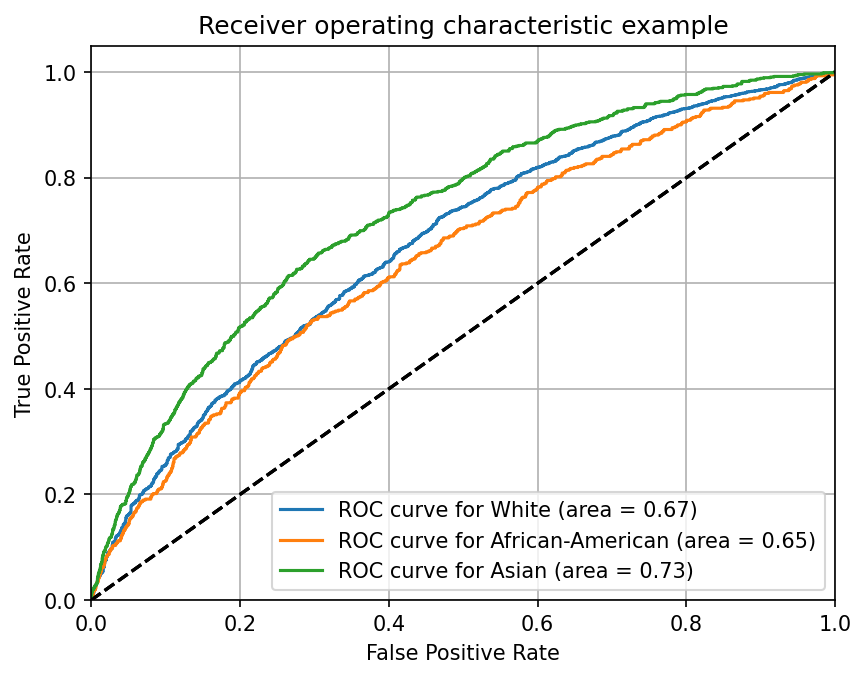

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6662
           1       0.16      0.18      0.17       570
           2       0.29      0.32      0.30       849

    accuracy                           0.74      8081
   macro avg       0.44      0.45      0.44      8081
weighted avg       0.75      0.74      0.75      8081

[[5605  469  588]
 [ 392  103   75]
 [ 517   62  270]]


In [26]:
name = 'chexpert_race_3categ_full_'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

253/253 [==============================] - 0s 867us/step


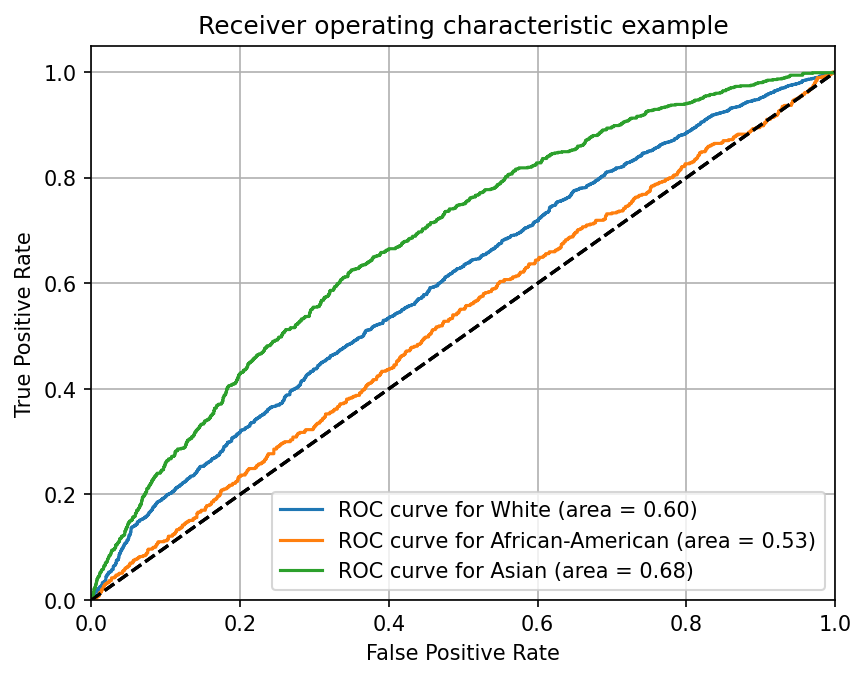

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      6662
           1       0.09      0.05      0.06       570
           2       0.24      0.18      0.21       849

    accuracy                           0.76      8081
   macro avg       0.39      0.38      0.38      8081
weighted avg       0.72      0.76      0.74      8081

[[5971  257  434]
 [ 476   28   66]
 [ 670   22  157]]


In [27]:
name = 'chexpert_race_3categ_segment_segment_0__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

253/253 [==============================] - 0s 894us/step


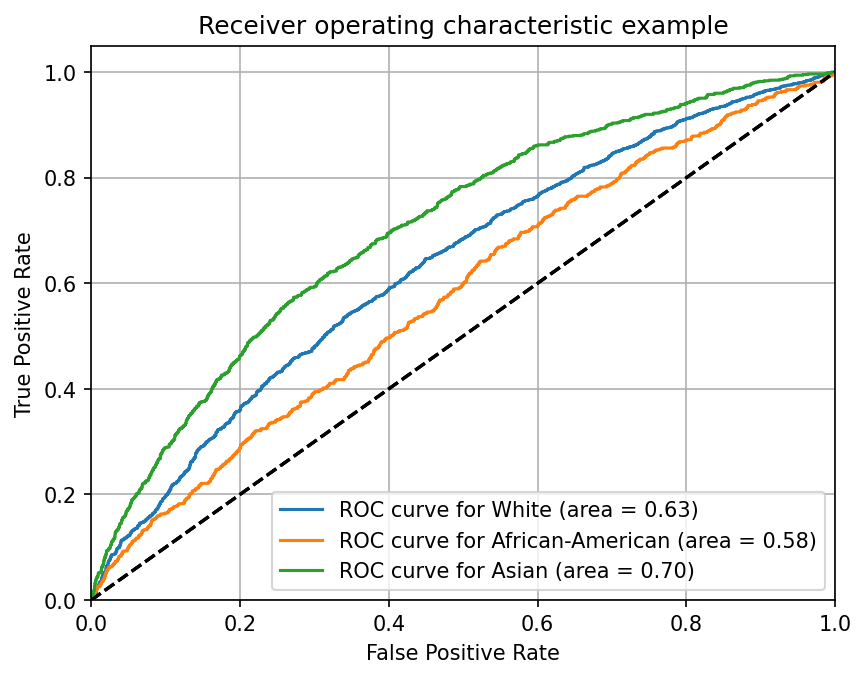

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6662
           1       0.16      0.07      0.10       570
           2       0.25      0.24      0.24       849

    accuracy                           0.76      8081
   macro avg       0.42      0.40      0.40      8081
weighted avg       0.74      0.76      0.75      8081

[[5924  202  536]
 [ 447   42   81]
 [ 623   22  204]]


In [28]:
name = 'chexpert_race_3categ_segment_segment_1__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

253/253 [==============================] - 0s 890us/step


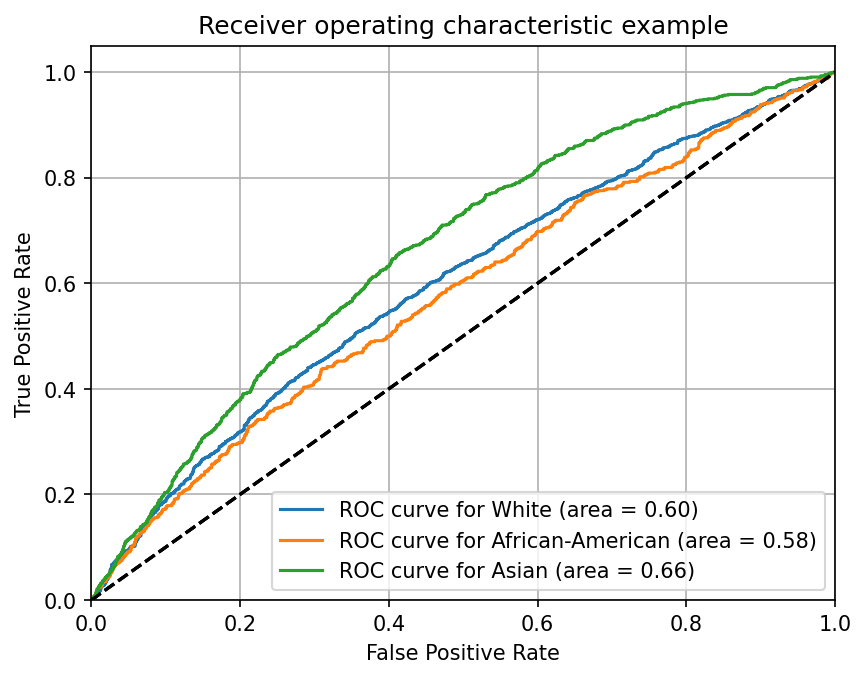

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      6662
           1       0.13      0.06      0.08       570
           2       0.21      0.15      0.17       849

    accuracy                           0.76      8081
   macro avg       0.39      0.37      0.37      8081
weighted avg       0.72      0.76      0.74      8081

[[6013  201  448]
 [ 498   33   39]
 [ 703   19  127]]


In [29]:
name = 'chexpert_race_3categ_segment_segment_2__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)

253/253 [==============================] - 0s 894us/step


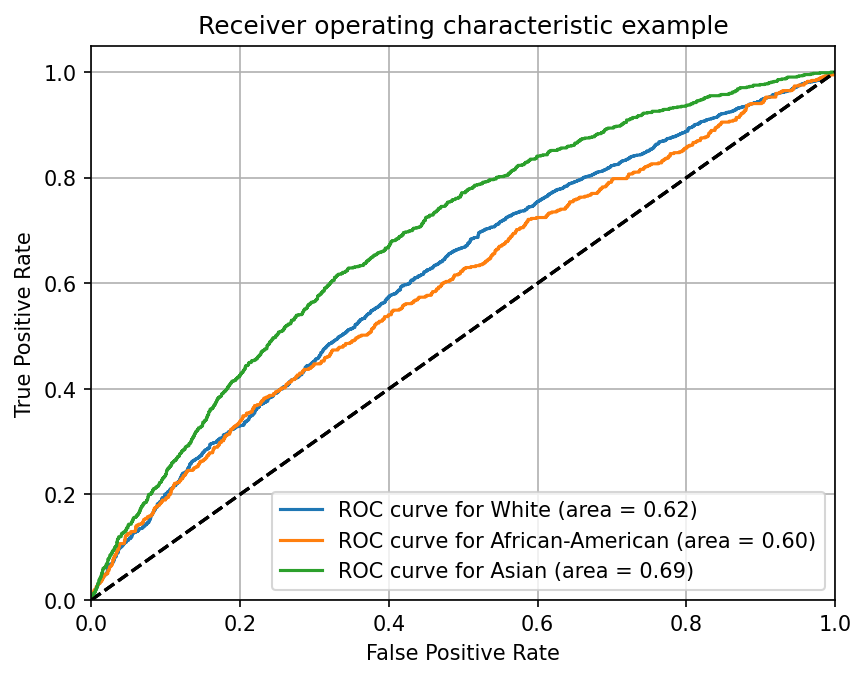

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6662
           1       0.17      0.11      0.13       570
           2       0.23      0.21      0.22       849

    accuracy                           0.75      8081
   macro avg       0.41      0.40      0.40      8081
weighted avg       0.73      0.75      0.74      8081

[[5846  275  541]
 [ 462   62   46]
 [ 644   29  176]]


In [30]:
name = 'chexpert_race_3categ_segment_segment_3__'
test_data = np.load(name + 'belongings.npy',allow_pickle=True).item()
x_chex_total = test_data['x_test']
y_chex_total = test_data['y_test']
mask_chex_total = test_data['mask_excluded']
model_chex_total = load_model(name + '_mdl.h5')
y_predict_chex_total = model_chex_total.predict(x_chex_total[:,mask_chex_total])
ROC_CURVE_3CAT(test_y=y_chex_total,prob_test_vec=y_predict_chex_total)